    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363       0   68   190.0    94.0      29.0       105.0       40.8   
1  14861698       1   20   166.0    60.0      14.0        94.0       40.3   
2  11179863       0   69   179.0    79.0       5.0        88.0       38.7   
3  16180408       1   34   179.0    71.0      13.0       100.0       40.5   
4  17771927       1   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0  
[129.19138  218.77893   38.350796 ...  34.858326  93.71796   17.681744]
1.4679288417365817


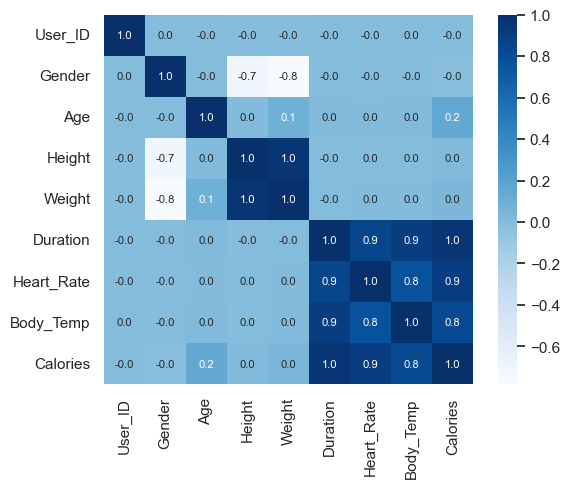

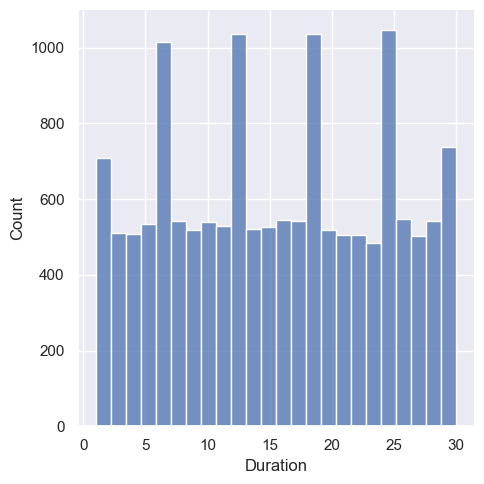

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import numpy as np
import pandas as pd
caloriesData = pd.read_csv('/Users/saminthachandrasiri/JupyterNotebooks/calories.csv')
factorsData = pd.read_csv('/Users/saminthachandrasiri/JupyterNotebooks/exercise.csv')
netData = pd.concat([factorsData, caloriesData['Calories']], axis=1)
sns.set()


netData.replace({'Gender':{'male':0,'female':1}}, inplace = True)
print(netData.head())
X = netData.drop(columns=['User_ID','Calories'], axis=1)
Y = netData['Calories']

correlation = netData.corr()
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
sns.displot(netData, x='Duration')


trainingX, testX, trainingY, testY = train_test_split(X, Y, test_size=0.15, random_state=2)
trainingModel = XGBRegressor()
trainingModel.fit(trainingX, trainingY)
testDataOutput = trainingModel.predict(testX)
print(testDataOutput)
Error = metrics.mean_absolute_error(testY, testDataOutput)
print(Error)